<h1><center><font size="6">Visualize DICOM Images</font></center></h1>

<img src="https://kaggle2.blob.core.windows.net/datasets-images/1012/1826/dcf783d7dd5f628dccb49111ade64649/dataset-card.jpg" width=400></img>  

# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a> 
    - <a href='#31'>Read overview data</a> 
    - <a href='#32'>Read TIFF data</a> 
    - <a href='#33'>Read DICOM data</a>  
- <a href='#4'>Data exploration</a>
    - <a href='#41'>Check data consistency</a> 
    - <a href='#42'>Show TIFF images</a> 
    - <a href='#43'>Show DICOM data</a> 
- <a href='#7'>Conclusions</a>
- <a href='#8'>References</a>

# <a id="1">Introduction<a/>

## Overview  

The dataset is designed to allow for different methods to be tested for examining the trends in CT image data associated with using contrast and patient age. The basic idea is to identify image textures, statistical patterns and features correlating strongly with these traits and possibly build simple tools for automatically classifying these images when they have been misclassified (or finding outliers which could be suspicious cases, bad measurements, or poorly calibrated machines)

## Data
The data are a tiny subset of images from the cancer imaging archive. They consist of the middle slice of all CT images taken where valid age, modality, and contrast tags could be found.   TCIA Archive Link - https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD

# <a id="2">Load packages</a>

We will load the packages for showing tiff images and dicom data.   
For dicom data, we are loading the **dicom**package.   


In [1]:
IS_LOCAL = True
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
if(IS_LOCAL):
    import pydicom as dicom
else:
    import dicom
import os


if(IS_LOCAL):
    PATH="../input/medical-image-dicom/"
else:
    PATH="../input/"
print(os.listdir(PATH))

['001.dcm', '002.dcm', '003.dcm', '004.dcm', '005.dcm', '006.dcm', '007.dcm', '008.dcm', '009.dcm', '010.dcm', '011.dcm', '012.dcm', '013.dcm', '014.dcm', '015.dcm', '016.dcm', '017.dcm', '018.dcm', '019.dcm', '020.dcm', '021.dcm', '022.dcm', '023.dcm', '024.dcm', '025.dcm', '026.dcm', '027.dcm', '028.dcm', '029.dcm', '030.dcm', '031.dcm', '032.dcm', '033.dcm', '034.dcm', '035.dcm', '036.dcm', '037.dcm', '038.dcm', '039.dcm', '040.dcm', '041.dcm', '042.dcm', '043.dcm', '044.dcm', '045.dcm', '046.dcm', '047.dcm', '048.dcm', '049.dcm', '050.dcm', '051.dcm', '052.dcm', '053.dcm', '054.dcm', '055.dcm', '056.dcm', '057.dcm', '058.dcm', '059.dcm', '060.dcm', '061.dcm', '062.dcm', '063.dcm', '064.dcm', '065.dcm', '066.dcm', '067.dcm', '068.dcm', '069.dcm', '070.dcm', '071.dcm', '072.dcm', '073.dcm', '074.dcm', '075.dcm', '076.dcm', '077.dcm', '078.dcm', '079.dcm', '080.dcm', '081.dcm', '082.dcm', '083.dcm', '084.dcm', '085.dcm', '086.dcm', '087.dcm', '088.dcm', '089.dcm', '090.dcm', '091.dcm'

# <a id="3">Read the data</a>


## <a id="33">Read DICOM data</a>

In [4]:
print("Number of DICOM files:", len(os.listdir(PATH)))

Number of DICOM files: 124


# <a id="4">Data exploration</a>

In [14]:
def show_images():
    img_data = list(os.listdir(PATH))[:16]
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.read_file(PATH+data_row)
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        #ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

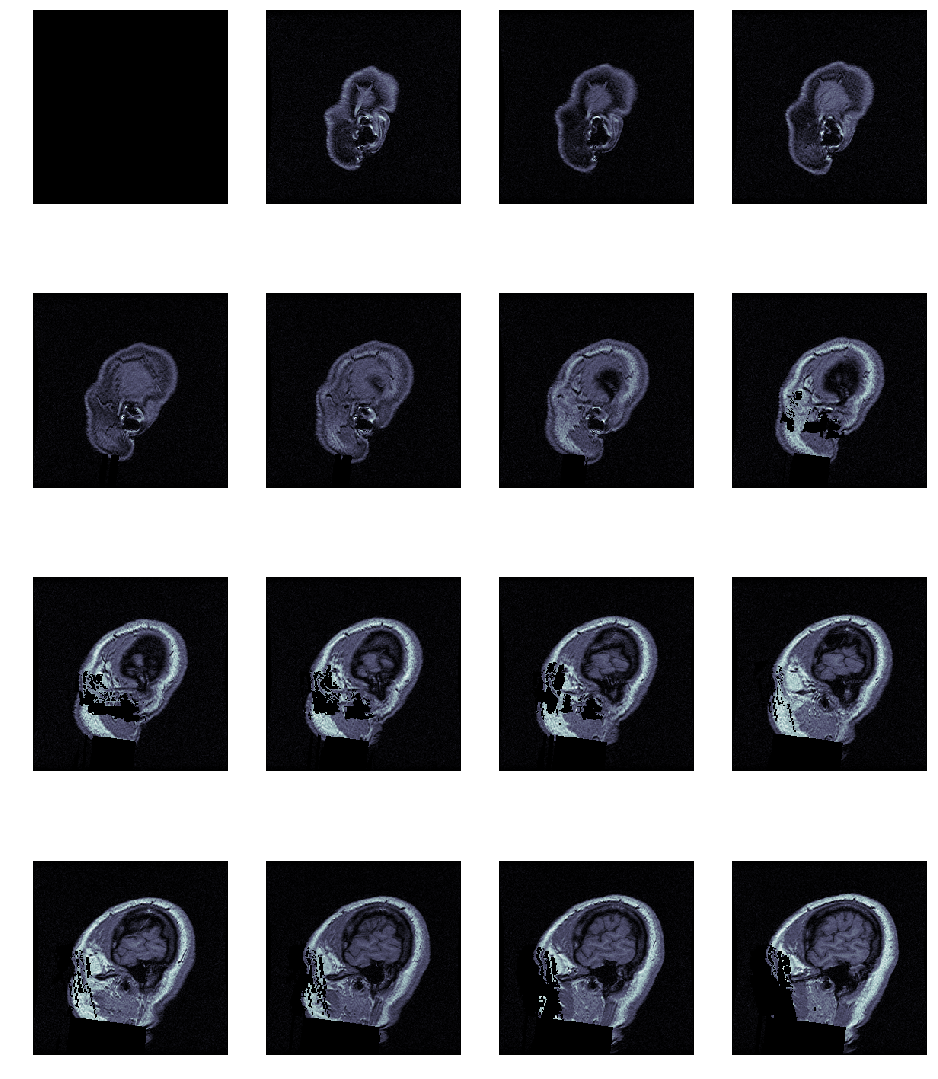

In [16]:
show_images()

## <a id="43">Show DICOM data</a>

We will show a subsample of 16 images from the total of 100 images.   
We will use grayscale.   
Ideally, if the DICOM images would be a set of slices from a single examen, they could be aggregated using a function like the one shown here: extract_voxel_data - which read the DICOM slices (each in a separate file) and aggregate the image data in a 3D voxel tensor. This will not be the case here, because we are storing slices from different patients and exams (one slice / exam / patient).

    # extract voxel data  
    def extract_voxel_data(list_of_dicom_files):  
        datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
         try:  
             voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)  
         except dicom_numpy.DicomImportException as e:  
         # invalid DICOM data  
             raise  
         return voxel_ndarray  

### More about DICOM data

A DICOM file containg much more information than the image itself that we represented. Let's glimpse, for one of the DICOM files, this information. We will read the first dicom file only and show this information.

In [35]:
dicom_file_path = img_data = list(os.listdir(PATH))[4]
dicom_file_dataset = dicom.read_file(PATH+dicom_file_path)
dicom_file_dataset

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0012) Instance Creation Date              DA: '20040315'
(0008, 0013) Instance Creation Time              TM: '114914'
(0008, 0014) Instance Creator UID                UI: 0.0.0.0
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 0.0.0.0
(0008, 0020) Study Date                          DA: '00000000'
(0008, 0021) Series Date                         DA: '00000000'
(0008, 0022) Acquisition Date                    DA: '00000000'
(0008, 0023) Content Date                        DA: '00000000'
(0008, 0030) Study Time                          TM: '000000'
(0008, 0031) Series Time                         TM: '000000'
(0008, 0032) Acquisition Time                    TM: '000000'
(0008, 0033) Content Time                        TM: '000000'
(0008, 0050) Accession Num

We can extract various fields from the DICOM FileDataset. Here are few examples:  
* Modality  
* Manufacturer
* Patient Age  
* Patient Sex
* Patient Name  
* Patient ID



In [19]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex: {}\nPatient Name: {}\nPatient ID: {}".format(
    dicom_file_dataset.Modality, 
    dicom_file_dataset.Manufacturer,
    dicom_file_dataset.PatientAge,
    dicom_file_dataset.PatientSex,
    dicom_file_dataset.PatientName,
    dicom_file_dataset.PatientID))

Modality: MR
Manufacturer: GE MEDICAL SYSTEMS
Patient Age: 000Y
Patient Sex: O
Patient Name: anon
Patient ID: anon


Some of the information are anonymized (like Name and ID), which is common standard for public medical data.   

We will modify the visualization function, to show parameters from the DICOM data instead of the parameters extracted from the image name.  



In [40]:
def show_dicom_images():
    img_data = list(os.listdir(PATH))[:16] 
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        data_row_img = dicom.read_file(PATH+data_row)
        modality = data_row_img.Modality
        age = data_row_img.PatientAge
        sliceid = data_row_img.InstanceNumber
        ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {}'.format(
         modality, age, sliceid))
    plt.show()


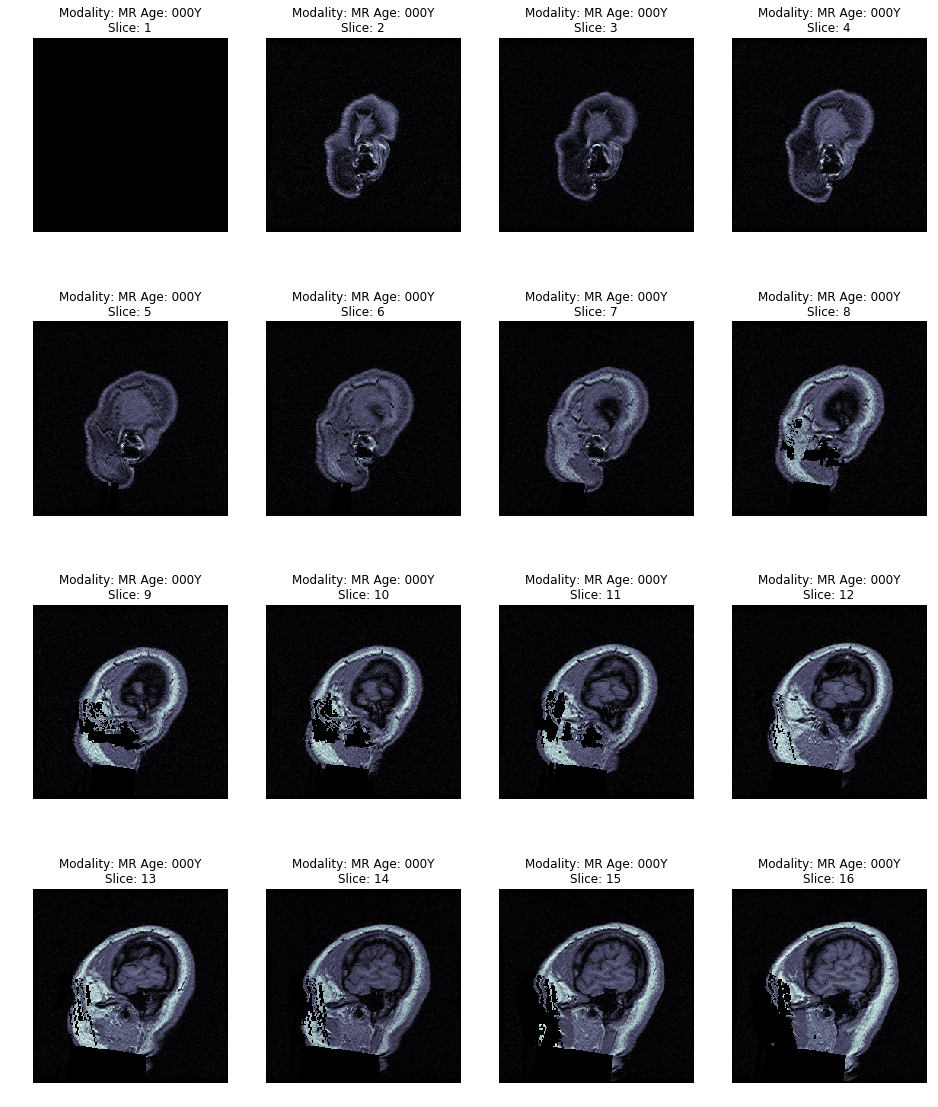

In [42]:
show_dicom_images()

In [48]:
# extract voxel data  
def extract_voxel_data(list_of_dicom_files):  
    datasets = [dicom.read_file(PATH+f) for f in list_of_dicom_files]  
    try:  
        voxel_ndarray, ijk_to_xyz = dicom.combine_slices(datasets)  
    except dicom.DicomImportException as e:  
    # invalid DICOM data  
        raise  
    return voxel_ndarray  

In [49]:
img_data = list(os.listdir(PATH))
extract_voxel_data(img_data)

AttributeError: module 'pydicom' has no attribute 'DicomImportException'

# Conclusion

We demonstrated how we can load and show **DICOM** image files.  



# References

 
[1] Python package for processing DICOM data, dicom-numpy, https://dicom-numpy.readthedocs.io     
[2] Viewing DICOM images in Python, https://pydicom.github.io/pydicom/stable/viewing_images.html   

